In [1]:
import pandas as pd
import numpy as np
import pickle as pickle
import IPython.display
from IPython.display import display

data = pd.read_csv(r'C:\Users\sesa638933\Desktop\OC\P5\filtered_data.csv', usecols=['Id','Title', 'Body', 'Tags'], index_col='Id')
data.reset_index(inplace=True)
data.drop(columns='Id', inplace=True)
data.head(10)

,Title,Body,Tags
0,"Error message ""error:0308010C:digital envelope...",<p>I created the default IntelliJ IDEA React p...,<node.js><reactjs><webpack><webstorm>
1,"How can I resolve the error ""The minCompileSdk...",<p>The error message:</p>\n<blockquote>\n<p>Th...,<java><android><kotlin><gradle>
2,"""You are running create-react-app 4.0.3 which ...",<p>I got an error while creating a React appli...,<javascript><reactjs><npm-install><yarnpkg><npx>
3,Bubble sort slower with -O3 than -O2 with GCC,"<p>I made a <a href=""https://en.wikipedia.org/...",<c><gcc><x86-64><cpu-architecture><compiler-op...
4,Webpack build failing with ERR_OSSL_EVP_UNSUPP...,<p>I'm having an issue with a Webpack build pr...,<webpack>
5,iOS 15 Navigation Bar Transparent,<p>My iOS app uses the storyboard for the UI a...,<swift><uinavigationcontroller><ios15><xcode13>
6,Resource linking fails on lStar,<p>I'm working on a React Native application. ...,<android><react-native>
7,Why is a segmentation fault not recoverable?,"<p>Following <a href=""https://stackoverflow.co...",<c++><c><exception><segmentation-fault>
8,What is this odd sorting algorithm?,"<p>Some <a href=""https://stackoverflow.com/a/6...",<python><algorithm><sorting>
9,Warning: Multiple merge bases detected. The li...,"<p>In Azure Repos, I have created a PR from br...",<git><azure><azure-devops><azure-repos>


In [2]:
data['Post'] = data.apply(lambda x: x['Title'] + ' ' + x['Body'] if x['Title'] == x['Title'] else x['Body'], axis=1)
corpus = data['Post'].to_list()
tags = data['Tags'].to_list()

print("Dix première observations")
display(data.head(10))

Dix première observations


,Title,Body,Tags,Post
0,"Error message ""error:0308010C:digital envelope...",<p>I created the default IntelliJ IDEA React p...,<node.js><reactjs><webpack><webstorm>,"Error message ""error:0308010C:digital envelope..."
1,"How can I resolve the error ""The minCompileSdk...",<p>The error message:</p>\n<blockquote>\n<p>Th...,<java><android><kotlin><gradle>,"How can I resolve the error ""The minCompileSdk..."
2,"""You are running create-react-app 4.0.3 which ...",<p>I got an error while creating a React appli...,<javascript><reactjs><npm-install><yarnpkg><npx>,"""You are running create-react-app 4.0.3 which ..."
3,Bubble sort slower with -O3 than -O2 with GCC,"<p>I made a <a href=""https://en.wikipedia.org/...",<c><gcc><x86-64><cpu-architecture><compiler-op...,Bubble sort slower with -O3 than -O2 with GCC ...
4,Webpack build failing with ERR_OSSL_EVP_UNSUPP...,<p>I'm having an issue with a Webpack build pr...,<webpack>,Webpack build failing with ERR_OSSL_EVP_UNSUPP...
5,iOS 15 Navigation Bar Transparent,<p>My iOS app uses the storyboard for the UI a...,<swift><uinavigationcontroller><ios15><xcode13>,iOS 15 Navigation Bar Transparent <p>My iOS ap...
6,Resource linking fails on lStar,<p>I'm working on a React Native application. ...,<android><react-native>,Resource linking fails on lStar <p>I'm working...
7,Why is a segmentation fault not recoverable?,"<p>Following <a href=""https://stackoverflow.co...",<c++><c><exception><segmentation-fault>,Why is a segmentation fault not recoverable? <...
8,What is this odd sorting algorithm?,"<p>Some <a href=""https://stackoverflow.com/a/6...",<python><algorithm><sorting>,What is this odd sorting algorithm? <p>Some <a...
9,Warning: Multiple merge bases detected. The li...,"<p>In Azure Repos, I have created a PR from br...",<git><azure><azure-devops><azure-repos>,Warning: Multiple merge bases detected. The li...


In [3]:
print("Premier élément de la liste corpus\n")
display(corpus[0])
print("\n")

print("Premier éléments de la liste tags\n")
display(tags[0])

print(f"Occurences dans le corpus: {len(corpus)}")
print(f"Occurences dans les tags: {len(tags)}")

Premier élément de la liste corpus



'Error message "error:0308010C:digital envelope routines::unsupported" <p>I created the default IntelliJ IDEA React project and got this:</p>\n<pre class="lang-none prettyprint-override"><code>Error: error:0308010C:digital envelope routines::unsupported\n    at new Hash (node:internal/crypto/hash:67:19)\n    at Object.createHash (node:crypto:130:10)\n    at module.exports (/Users/user/Programming Documents/WebServer/untitled/node_modules/webpack/lib/util/createHash.js:135:53)\n    at NormalModule._initBuildHash (/Users/user/Programming Documents/WebServer/untitled/node_modules/webpack/lib/NormalModule.js:417:16)\n    at handleParseError (/Users/user/Programming Documents/WebServer/untitled/node_modules/webpack/lib/NormalModule.js:471:10)\n    at /Users/user/Programming Documents/WebServer/untitled/node_modules/webpack/lib/NormalModule.js:503:5\n    at /Users/user/Programming Documents/WebServer/untitled/node_modules/webpack/lib/NormalModule.js:358:12\n    at /Users/user/Programming Doc



Premier éléments de la liste tags



'<node.js><reactjs><webpack><webstorm>'

Occurences dans le corpus: 2785
Occurences dans les tags: 2785


In [4]:
def clean_html(text):
    """
    Remove HTML from a text.
    
    Args:
        text(String): Row text with html 
             
    Returns:
        cleaned String
    """
    import lxml
    import html5lib
    from bs4 import BeautifulSoup
 
    soup = BeautifulSoup(text, "html5lib")

    for sent in soup(['style', 'script']):
            sent.decompose()
   
        
    return ' '.join(soup.stripped_strings)

corpus_wo_html = [clean_html(text) for text in corpus]

print("Premier élément de la liste corpus sans html\n")
display(corpus_wo_html[0])
print("\n")

print(f"Occurences dans le corpus: {len(corpus_wo_html)}")

Premier élément de la liste corpus sans html



'Error message "error:0308010C:digital envelope routines::unsupported" I created the default IntelliJ IDEA React project and got this: Error: error:0308010C:digital envelope routines::unsupported\n    at new Hash (node:internal/crypto/hash:67:19)\n    at Object.createHash (node:crypto:130:10)\n    at module.exports (/Users/user/Programming Documents/WebServer/untitled/node_modules/webpack/lib/util/createHash.js:135:53)\n    at NormalModule._initBuildHash (/Users/user/Programming Documents/WebServer/untitled/node_modules/webpack/lib/NormalModule.js:417:16)\n    at handleParseError (/Users/user/Programming Documents/WebServer/untitled/node_modules/webpack/lib/NormalModule.js:471:10)\n    at /Users/user/Programming Documents/WebServer/untitled/node_modules/webpack/lib/NormalModule.js:503:5\n    at /Users/user/Programming Documents/WebServer/untitled/node_modules/webpack/lib/NormalModule.js:358:12\n    at /Users/user/Programming Documents/WebServer/untitled/node_modules/loader-runner/lib/L



Occurences dans le corpus: 2785


In [5]:
def text_cleaning(text):
    """
    Remove figures, punctuation, words shorter than two letters (excepted C or R) in a lowered text. 
    
    Args:
        text(String): Row text to clean
        
    Returns:
       res(string): Cleaned text
    """
    import re
    
    pattern = re.compile(r'[^\w]|[\d_]')
    
    try: 
        res = re.sub(pattern," ", text).lower()
    except TypeError:
        return text
    
    res = res.split(" ")
    res = list(filter(lambda x: len(x)>3 , res))
    res = " ".join(res)
    return res

In [6]:
cleaned_corpus = [text_cleaning(text) for text in corpus_wo_html]
cleaned_tags = [text_cleaning(text).strip() for text in tags]


print("Premier élément de la liste cleaned_corpus\n")
display(cleaned_corpus[0])
print("\n")

print("Premier élément de la liste cleaned_tags\n")
display(cleaned_tags[0])
print("\n")

print(f"Occurences dans le corpus nettoyé: {len(cleaned_corpus)}")
print(f"Occurences dans les tags nettoyés: {len(cleaned_tags)}")

Premier élément de la liste cleaned_corpus



'error message error digital envelope routines unsupported created default intellij idea react project this error error digital envelope routines unsupported hash node internal crypto hash object createhash node crypto module exports users user programming documents webserver untitled node modules webpack util createhash normalmodule initbuildhash users user programming documents webserver untitled node modules webpack normalmodule handleparseerror users user programming documents webserver untitled node modules webpack normalmodule users user programming documents webserver untitled node modules webpack normalmodule users user programming documents webserver untitled node modules webpack normalmodule users user programming documents webserver untitled node modules loader runner loaderrunner iteratenormalloaders users user programming documents webserver untitled node modules loader runner loaderrunner iteratenormalloaders users user programming documents webserver untitled node module



Premier élément de la liste cleaned_tags



'node reactjs webpack webstorm'



Occurences dans le corpus nettoyé: 2785
Occurences dans les tags nettoyés: 2785


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060]
[nltk_data]     Une tentative de connexion a échoué car le parti
[nltk_data]     connecté n’a pas répondu convenablement au-delà d’une
[nltk_data]     certaine durée ou une connexion établie a échoué car
[nltk_data]     l’hôte de connexion n’a pas répondu>
[nltk_data] Error loading punkt: <urlopen error [WinError 10060] Une
[nltk_data]     tentative de connexion a échoué car le parti connecté
[nltk_data]     n’a pas répondu convenablement au-delà d’une certaine
[nltk_data]     durée ou une connexion établie a échoué car l’hôte de
[nltk_data]     connexion n’a pas répondu>


False

In [8]:
def tokenize(text):
    """
    Tokenize words of a text.
    
    Args:
    
        text(String): Row text
        
    Returns
    
        res(list): Tokenized string.
    """
    
    

    stop_words = set(stopwords.words('english'))
    
    try:
        res = word_tokenize(text, language='english')
    except TypeError:
        return text
    
    res = [token for token in res if token not in stop_words]
    return res

In [9]:
tokenized_corpus = [tokenize(text) for text in cleaned_corpus]
tokenized_tags = [tokenize(text) for text in cleaned_tags]

print("Premier élément de la liste tokenized_corpus\n")
display(tokenized_corpus[0])
print("\n")
print(f"Longueur du premier éléments de liste tokenized_corpus: {len(tokenized_corpus[0])}")
print("\n")

print("Premier élément de la liste tokenized_tags\n")
display(tokenized_tags[0])
print('\n')


print(f"Occurences dans le corpus tokenizé: {len(tokenized_corpus)}")
print(f"Occurences dans la liste des tags: {len(tokenized_tags)}")

Premier élément de la liste tokenized_corpus



['error',
 'message',
 'error',
 'digital',
 'envelope',
 'routines',
 'unsupported',
 'created',
 'default',
 'intellij',
 'idea',
 'react',
 'project',
 'error',
 'error',
 'digital',
 'envelope',
 'routines',
 'unsupported',
 'hash',
 'node',
 'internal',
 'crypto',
 'hash',
 'object',
 'createhash',
 'node',
 'crypto',
 'module',
 'exports',
 'users',
 'user',
 'programming',
 'documents',
 'webserver',
 'untitled',
 'node',
 'modules',
 'webpack',
 'util',
 'createhash',
 'normalmodule',
 'initbuildhash',
 'users',
 'user',
 'programming',
 'documents',
 'webserver',
 'untitled',
 'node',
 'modules',
 'webpack',
 'normalmodule',
 'handleparseerror',
 'users',
 'user',
 'programming',
 'documents',
 'webserver',
 'untitled',
 'node',
 'modules',
 'webpack',
 'normalmodule',
 'users',
 'user',
 'programming',
 'documents',
 'webserver',
 'untitled',
 'node',
 'modules',
 'webpack',
 'normalmodule',
 'users',
 'user',
 'programming',
 'documents',
 'webserver',
 'untitled',
 'node',




Longueur du premier éléments de liste tokenized_corpus: 139


Premier élément de la liste tokenized_tags



['node', 'reactjs', 'webpack', 'webstorm']



Occurences dans le corpus tokenizé: 2785
Occurences dans la liste des tags: 2785


In [10]:
nltk.download('averaged_perceptron_tagger')

def filtering_nouns(tokens):
    """
    Filter singular nouns
    
    Args:
        tokens(list): A list o tokens
        
    
    Returns:
    
        res(list): Filtered token list
    """ 
    
    import nltk
    
    res = nltk.pos_tag(tokens)
    
    res = [token[0] for token in res if token[1] == 'NN']
    
    return res

noun_corpus = [filtering_nouns(tokens) for tokens in tokenized_corpus]

print("Premier élément de la liste noun_corpus\n")
display(noun_corpus[0])
print("\n")

print(f"Longueur du premier éléments de liste noun_corpus: {len(noun_corpus[0])}")
print("\n")

print(f"Occurences dans le corpus tokenizé: {len(noun_corpus)}")

[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [WinError 10060] Une tentative de connexion a échoué
[nltk_data]     car le parti connecté n’a pas répondu convenablement
[nltk_data]     au-delà d’une certaine durée ou une connexion établie
[nltk_data]     a échoué car l’hôte de connexion n’a pas répondu>


Premier élément de la liste noun_corpus



['error',
 'message',
 'error',
 'envelope',
 'default',
 'intellij',
 'idea',
 'react',
 'project',
 'error',
 'error',
 'envelope',
 'node',
 'crypto',
 'hash',
 'createhash',
 'node',
 'crypto',
 'module',
 'node',
 'createhash',
 'normalmodule',
 'initbuildhash',
 'node',
 'handleparseerror',
 'node',
 'node',
 'node',
 'node',
 'runner',
 'loaderrunner',
 'node',
 'runner',
 'loaderrunner',
 'node',
 'runner',
 'loaderrunner',
 'node',
 'throw',
 'issue',
 'webpack']



Longueur du premier éléments de liste noun_corpus: 41


Occurences dans le corpus tokenizé: 2785


In [11]:
nltk.download('wordnet')
def lemmatization(tokens):
    """
    Transform tokens into lems 
    
    Args:
        tokens(list): List of tokens
        
    Returns:
        lemmatized(list): List of lemmatized tokens
    """
    import nltk
    from nltk.stem import WordNetLemmatizer
    
    lemmatizer = WordNetLemmatizer()
    lemmatized = []
    
    for token in tokens:
        lemmatized.append(lemmatizer.lemmatize(token))
        
    return lemmatized

lemmatized_corpus = [lemmatization(tokens) for tokens in noun_corpus]
lemmatized_tags = [lemmatization(tokens) for tokens in tokenized_tags]

tags_wo_blanks = []
for tokens in lemmatized_tags:
    tokens = [token for token in tokens if len(token)>1]
    tags_wo_blanks.append(tokens)

print("Premier élément de la liste lemmatized_corpus\n")
display(lemmatized_corpus[0])
print("\n")

print(f"Longueur du premier éléments de liste lemmatized_corpus: {len(lemmatized_corpus[0])}")
print("\n")

print("Premier élément de la liste lemmatized_tags\n")
display(tags_wo_blanks[0])


print(f"Occurences dans le corpus lemmatisé: {len(lemmatized_corpus)}")
print(f"Occurences dans les tags lemmatisés: {len(tags_wo_blanks)}")

[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] Une
[nltk_data]     tentative de connexion a échoué car le parti connecté
[nltk_data]     n’a pas répondu convenablement au-delà d’une certaine
[nltk_data]     durée ou une connexion établie a échoué car l’hôte de
[nltk_data]     connexion n’a pas répondu>


Premier élément de la liste lemmatized_corpus



['error',
 'message',
 'error',
 'envelope',
 'default',
 'intellij',
 'idea',
 'react',
 'project',
 'error',
 'error',
 'envelope',
 'node',
 'crypto',
 'hash',
 'createhash',
 'node',
 'crypto',
 'module',
 'node',
 'createhash',
 'normalmodule',
 'initbuildhash',
 'node',
 'handleparseerror',
 'node',
 'node',
 'node',
 'node',
 'runner',
 'loaderrunner',
 'node',
 'runner',
 'loaderrunner',
 'node',
 'runner',
 'loaderrunner',
 'node',
 'throw',
 'issue',
 'webpack']



Longueur du premier éléments de liste lemmatized_corpus: 41


Premier élément de la liste lemmatized_tags



['node', 'reactjs', 'webpack', 'webstorm']

Occurences dans le corpus lemmatisé: 2785
Occurences dans les tags lemmatisés: 2785


In [12]:
import os
os.environ.keys()

KeysView(environ({'ALLUSERSPROFILE': 'C:\\ProgramData', 'APPDATA': 'C:\\Users\\sesa638933\\AppData\\Roaming', 'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files', 'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files', 'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files', 'COMPUTERNAME': 'WTFRLVSE203097L', 'COMSPEC': 'C:\\WINDOWS\\system32\\cmd.exe', 'DEFLOGDIR': 'C:\\ProgramData\\McAfee\\Endpoint Security\\Logs', 'DRIVERDATA': 'C:\\Windows\\System32\\Drivers\\DriverData', 'FPS_BROWSER_APP_PROFILE_STRING': 'Internet Explorer', 'FPS_BROWSER_USER_PROFILE_STRING': 'Default', 'HOMEDRIVE': 'C:', 'HOMEPATH': '\\Users\\sesa638933', 'LOCALAPPDATA': 'C:\\Users\\sesa638933\\AppData\\Local', 'LOGONSERVER': '\\\\WDEUR20', 'NO_PROXY': '<local_addresses> : localhost,127.0.0.1,10.128.0.0/16,10.214.0.0/16,172.20.0.0/16,172.30.0.0/16,10.234.0.0/16,172.30.0.0/16,192.168.0.0/16,10.179.0.0/16,139.158.0.0/16,github.schneider-electric.com,teamforge.schneider-electric.com,box.com,*.ci-ffaa

In [13]:
print(f"Observations restantes du corpus original: {data.shape[0]}")

Observations restantes du corpus original: 2785


In [14]:
joined_corpus = [" ".join(text) for text in lemmatized_corpus]
corpus_df = pd.DataFrame(joined_corpus, columns=['preprocessed_text'])
corpus_df['len_text'] = corpus_df['preprocessed_text'].apply(lambda x: len(x))

joined_tags = [" ".join(tags) for tags in tags_wo_blanks]
tag_df = pd.DataFrame(joined_tags, columns=['preprocessed_tags'])
tag_df['len_tags'] = tag_df['preprocessed_tags'].apply(lambda x: len(x))

corpus_tag_df = pd.concat([corpus_df, tag_df], axis=1)

empty_data_idx = corpus_tag_df[(corpus_tag_df['len_text']==0) | (corpus_tag_df['len_tags']==0)].index



empty_data_idx

corpus_tag_df

data

corpus_tag_df.drop(labels=empty_data_idx, inplace=True)
data.drop(index=empty_data_idx, axis = 0, inplace=True)



print(f"observations restantes du corpus traité: {corpus_tag_df.shape[0]}")

observations restantes du corpus traité: 2739


In [15]:
corpus_tag_df['splitted_text'] = corpus_tag_df['preprocessed_text'].apply(lambda x: x.split(' ') )
corpus_tag_df['splitted_tags'] = corpus_tag_df['preprocessed_tags'].apply(lambda x: x.split(' ') )

filtered_corpus = corpus_tag_df['splitted_text'].to_list()
filtered_tags = corpus_tag_df['splitted_tags'].to_list()
filtered_original_posts = data['Post'].to_list()

filtered_tokenized_vs_original = pd.concat([data['Post'],
                                            corpus_tag_df['splitted_text'], 
                                            corpus_tag_df['splitted_tags']],
                                            axis=1)

filtered_tokenized_vs_original.to_csv(r"C:\Users\sesa638933\Desktop\OC\P5\cleaned_corpus.csv", index=False)
filtered_tokenized_vs_original.to_pickle(r'C:\Users\sesa638933\Desktop\OC\P5\cleaned_corpus.pkl')

filtered_tokenized_vs_original.head(10)

 

,Post,splitted_text,splitted_tags
0,"Error message ""error:0308010C:digital envelope...","[error, message, error, envelope, default, int...","[node, reactjs, webpack, webstorm]"
1,"How can I resolve the error ""The minCompileSdk...","[error, mincompilesdk, dependency, java, kotli...","[java, android, kotlin, gradle]"
2,"""You are running create-react-app 4.0.3 which ...","[create, react, release, error, application]","[javascript, reactjs, install, yarnpkg]"
3,Bubble sort slower with -O3 than -O2 with GCC ...,"[sort, sort, implementation, performance, flag...","[architecture, compiler, optimization]"
4,Webpack build failing with ERR_OSSL_EVP_UNSUPP...,"[webpack, build, issue, webpack, process, erro...",[webpack]
5,iOS 15 Navigation Bar Transparent <p>My iOS ap...,"[navigation, transparent, tint, background, co...","[swift, uinavigationcontroller, xcode]"
6,Resource linking fails on lStar <p>I'm working...,"[resource, application, android, environment, ...","[android, react, native]"
7,Why is a segmentation fault not recoverable? <...,"[segmentation, fault, question, mine, state, k...","[exception, segmentation, fault]"
8,What is this odd sorting algorithm? <p>Some <a...,"[algorithm, answer, swap, note, range, make, o...","[python, algorithm, sorting]"
9,Warning: Multiple merge bases detected. The li...,"[merge, list, azure, repos, branch, branch, me...","[azure, azure, devops, azure, repos]"


In [16]:
def build_word_distribution(corpus):
    """
    Build corpus word distribution
    
    Args:
        Corpus(List of lists): Original corpus
    
    Returns:
        
        word_dist_df(DataFrame): Word distribution of the corpus
    """
    
    from nltk import FreqDist
    word_corpus = [token for token_list in corpus for token in token_list]
    word_dist = FreqDist(word_corpus)
    word_dist_df = pd.DataFrame(word_dist.items(), columns=['Word', 'Frequency']).set_index('Word')
    word_dist_df.sort_values("Frequency", ascending=False, inplace=True)

    return word_dist_df

word_dist = build_word_distribution(filtered_corpus)

print(f"Nombre de tokens du corpus {word_dist.shape[0]}")
print("Affichage des 20 tokens les plus utilisés")
display(word_dist.head(20))

Nombre de tokens du corpus 19426
Affichage des 20 tokens les plus utilisés


,Frequency
Word,
java,4223
error,2926
name,2273
version,2244
file,2013
class,1834
code,1811
import,1795
http,1720


In [17]:
tag_dist = build_word_distribution(filtered_tags)
print("Top 20 des tags les plus utilisés")
display(tag_dist.head(20))
print(f"Nombre de tags: {len(tag_dist)}")
first_200_tags = tag_dist[0:200].index.to_list()

Top 20 des tags les plus utilisés


,Frequency
Word,
python,515
android,414
javascript,283
java,246
reactjs,201
react,165
studio,155
node,130
flutter,127


Nombre de tags: 1883


In [18]:
print(f"Observations restantes dans le corpus original: {data.shape[0]}")
filtered_corpus_tag_df = corpus_tag_df.copy()
filtered_corpus_tag_df['tags_in_top200'] = filtered_corpus_tag_df['splitted_tags'].apply(lambda tags: [tag for tag in tags if tag in first_200_tags])

Observations restantes dans le corpus original: 2739


In [19]:
filtered_corpus_tag_df['len_tags_in_top200'] = filtered_corpus_tag_df['tags_in_top200'].apply(lambda x: len(x))
missing_filtered_data = filtered_corpus_tag_df[filtered_corpus_tag_df['len_tags_in_top200'] == 0].index

filtered_corpus_tag_df.drop(index=missing_filtered_data, inplace=True)
data.drop(index=missing_filtered_data, inplace=True)
print(f"Observations restantes dans le coprus traité: {filtered_corpus_tag_df.shape[0]}")

Observations restantes dans le coprus traité: 2549


In [20]:
top200_corpus = filtered_corpus_tag_df['splitted_text'].to_list()
top200_joined_corpus = filtered_corpus_tag_df['preprocessed_text'].to_list()
top200_tags = filtered_corpus_tag_df['tags_in_top200'].to_list()

In [21]:
word_dist_top200 = build_word_distribution(top200_corpus)
print(f"Nombre de tokens du corpus {word_dist_top200.shape[0]}")
print("Affichage des 20 tokens les plus utilisés")
display(word_dist_top200.head(20))
print("Nombre des tokens ayant plus de 1000 occurences sur le corpus filtré")
word_dist_top200[word_dist_top200["Frequency"]>=1000].shape[0]

Nombre de tokens du corpus 16985
Affichage des 20 tokens les plus utilisés


,Frequency
Word,
java,4219
error,2788
name,2188
version,2166
file,1942
import,1777
class,1746
code,1710
http,1637


Nombre des tokens ayant plus de 1000 occurences sur le corpus filtré


17

In [22]:
tag_dist_top_200 = build_word_distribution(top200_tags)
print("Top 20 des tags les plus utilisés")
display(tag_dist_top_200.head(20))
print(f"Nombre de tags: {len(tag_dist_top_200)}")

Top 20 des tags les plus utilisés


,Frequency
Word,
python,515
android,414
javascript,283
java,246
reactjs,201
react,165
studio,155
node,130
flutter,127


Nombre de tags: 200


In [23]:
 
from sklearn.feature_extraction.text import TfidfVectorizer
vocabulary = list(word_dist_top200[word_dist_top200["Frequency"]>=1000].index)
tfidf_vectorizer = TfidfVectorizer(vocabulary=vocabulary)
X = tfidf_vectorizer.fit_transform(top200_joined_corpus)
tfidf_data = pd.DataFrame(X.toarray(), columns=vocabulary)
print("Affichage des 10 premiers posts vectorisés via le modèle de TF-IDF")
display(tfidf_data.head(10))
print(f" Nombre d'observations: {tfidf_data.shape[0]}, nombre de variables: {tfidf_data.shape[1]}")

Affichage des 10 premiers posts vectorisés via le modèle de TF-IDF


,java,error,name,version,file,import,class,code,http,return,line,value,type,function,const,path,python
0,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
1,0.592482,0.684021,0.000000,0.0,0.425536,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.246409,0.000000,0.969166,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
4,0.000000,0.584327,0.150171,0.0,0.000000,0.000000,0.0,0.351158,0.294742,0.000000,0.0,0.000000,0.0,0.0,0.370111,0.537442,0.000000
5,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.621957,0.783052,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
6,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.688459,0.0,0.000000,0.725276,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.931092,0.0,0.0,0.000000,0.000000,0.364785


 Nombre d'observations: 2549, nombre de variables: 17


In [24]:
 
import pickle 
from sklearn.feature_extraction.text import TfidfVectorizer
vocabulary = list(word_dist_top200[word_dist_top200["Frequency"]>=1000].index)
tfidf_vectorizer = TfidfVectorizer(vocabulary=vocabulary)
X = tfidf_vectorizer.fit_transform(top200_joined_corpus)
tfidf_data = pd.DataFrame(X.toarray(), columns=vocabulary)
print("Affichage des 10 premiers posts vectorisés via le modèle de TF-IDF")
display(tfidf_data.head(10))
print(f" Nombre d'observations: {tfidf_data.shape[0]}, nombre de variables: {tfidf_data.shape[1]}")

Affichage des 10 premiers posts vectorisés via le modèle de TF-IDF


,java,error,name,version,file,import,class,code,http,return,line,value,type,function,const,path,python
0,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
1,0.592482,0.684021,0.000000,0.0,0.425536,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.246409,0.000000,0.969166,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
4,0.000000,0.584327,0.150171,0.0,0.000000,0.000000,0.0,0.351158,0.294742,0.000000,0.0,0.000000,0.0,0.0,0.370111,0.537442,0.000000
5,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.621957,0.783052,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
6,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.688459,0.0,0.000000,0.725276,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.931092,0.0,0.0,0.000000,0.000000,0.364785


 Nombre d'observations: 2549, nombre de variables: 17


In [25]:
filename_tfidf_model = r'C:\Users\sesa638933\Desktop\OC\P5\tfidf_model.pkl'
pickle.dump(tfidf_vectorizer, open(filename_tfidf_model, 'wb'))

filename_vocabulary = r"C:\Users\sesa638933\Desktop\OC\P5\vocabulary.pkl"
pickle.dump(vocabulary, open(filename_vocabulary, 'wb'))

In [26]:
dedup_tags = []
for tags in top200_tags:
    dedup_tags.append(set(tags))

In [27]:
print('Affichage de la première occurence de dedup_tags')
display(dedup_tags[0])

Affichage de la première occurence de dedup_tags


{'node', 'reactjs', 'webpack'}

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_data, dedup_tags, test_size=0.2, random_state=42)

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [30]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [31]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

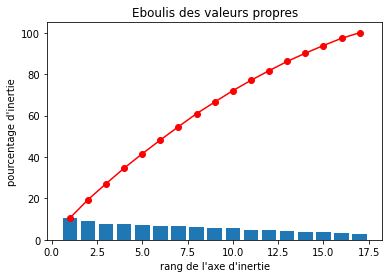

In [32]:
display_scree_plot(pca)

In [33]:
import pickle 

pca = PCA(n_components=0.85, random_state=42)
pca.fit(X_train)
X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)
print(f"Nombre de composantes principales: {pca.components_.shape[0]}")

Nombre de composantes principales: 13


In [34]:
filename_pca_model = r'C:\Users\sesa638933\Desktop\OC\P5\pca_model.pkl'
pickle.dump(pca, open(filename_pca_model, 'wb'))

In [35]:
from sklearn.preprocessing import MultiLabelBinarizer
import pickle 

mlb = MultiLabelBinarizer(classes=first_200_tags)
train_labels = mlb.fit_transform(y_train)
test_labels = mlb.transform(y_test)

print("Affichage des classes du modèle de vectorisation")
display(mlb.classes_)

Affichage des classes du modèle de vectorisation


array(['python', 'android', 'javascript', 'java', 'reactjs', 'react',
       'studio', 'node', 'flutter', 'google', 'visual', 'typescript',
       'github', 'docker', 'spring', 'azure', 'compose', 'kotlin',
       'angular', 'swift', 'xcode', 'jetpack', 'core', 'native', 'amazon',
       'html', 'algorithm', 'firebase', 'array', 'cloud', 'code',
       'window', 'macos', 'service', 'kubernetes', 'boot', 'apache',
       'router', 'gradle', 'data', 'panda', 'next', 'excel', 'dart',
       'swiftui', 'rust', 'powershell', 'selenium', 'numpy', 'material',
       'language', 'server', 'django', 'type', 'action', 'lawyer',
       'spark', 'gitlab', 'laravel', 'webpack', 'framework', 'linux',
       'blazor', 'security', 'apple', 'multithreading', 'ruby', 'list',
       'tensorflow', 'testing', 'file', 'dataframe', 'authentication',
       'error', 'string', 'navigation', 'generic', 'template', 'maven',
       'hook', 'postgresql', 'lambda', 'ubuntu', 'pipeline', 'package',
       'platform'

In [36]:
filename_mlb_model = r'C:\Users\sesa638933\Desktop\OC\P5\mlb_model.pkl'
pickle.dump(mlb, open(filename_mlb_model,'wb'))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, hamming_loss

models_performance = {}

def metrics_report(model_name, test_labels, predictions, performances):
    """
    Compute performance metrics of a model and store them in a dictionary
    
    Args:
        model_name(string): name of the evaluated model
        test_labels(array): labels related to predictors
        preductions(array): predicted results
        performances(dict): used dictionary to store metrics
    Returns:
        performances(dict): used dictionary to store metrics filed with models ones
    """    
    accuracy = accuracy_score(test_labels, predictions)
    macro_precision = precision_score(test_labels, predictions, average='macro')
    macro_recall = recall_score(test_labels, predictions, average='macro')
    macro_f1 = f1_score(test_labels, predictions, average='macro')
    micro_precision = precision_score(test_labels, predictions, average='micro')
    micro_recall = recall_score(test_labels, predictions, average='micro')
    micro_f1 = f1_score(test_labels, predictions, average='micro')
    hamLoss = hamming_loss(test_labels, predictions)
    print("------" + model_name + " Model Metrics-----")
    print("Accuracy: {:.4f}\nHamming Loss: {:.4f}\nPrecision:\n  - Macro: {:.4f}\n  - Micro: {:.4f}\nRecall:\n  - Macro: {:.4f}\n  - Micro: {:.4f}\nF1-measure:\n  - Macro: {:.4f}\n  - Micro: {:.4f}"\
          .format(accuracy, hamLoss, macro_precision, micro_precision, macro_recall, micro_recall, macro_f1, micro_f1))

    
    performances[model_name] = {}
    performances[model_name]["micro_precision"] =  micro_precision
    performances[model_name]["micro_recall"] = micro_recall
    performances[model_name]["micro_f1"] = micro_f1
    
    return performances

 

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_transformed, train_labels)
knn_predictions = knn_clf.predict(X_test_transformed)
metrics_report("knn", test_labels, knn_predictions, models_performance)

 

------knn Model Metrics-----
Accuracy: 0.0098
Hamming Loss: 0.0121
Precision:
  - Macro: 0.0425
  - Micro: 0.4786
Recall:
  - Macro: 0.0099
  - Micro: 0.0543
F1-measure:
  - Macro: 0.0143
  - Micro: 0.0976


C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


{'knn': {'micro_precision': 0.4785714285714286,
  'micro_recall': 0.054339010543390104,
  'micro_f1': 0.09759650400582665}}

In [38]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

svm_clf = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf.fit(X_train_transformed, train_labels)

svm_preds = svm_clf.predict(X_test_transformed)
metrics_report("svm", test_labels, svm_preds, models_performance)

------svm Model Metrics-----
Accuracy: 0.0137
Hamming Loss: 0.0118
Precision:
  - Macro: 0.0066
  - Micro: 0.7213
Recall:
  - Macro: 0.0040
  - Micro: 0.0357
F1-measure:
  - Macro: 0.0049
  - Micro: 0.0680


C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


{'knn': {'micro_precision': 0.4785714285714286,
  'micro_recall': 0.054339010543390104,
  'micro_f1': 0.09759650400582665},
 'svm': {'micro_precision': 0.7213114754098361,
  'micro_recall': 0.035685320356853206,
  'micro_f1': 0.06800618238021638}}

In [39]:
 
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_jobs=-1)
rf_clf.fit(X_train_transformed, train_labels)
rf_preds = rf_clf.predict(X_test_transformed)
metrics_report("Random Forest", test_labels, rf_preds, models_performance)

------Random Forest Model Metrics-----
Accuracy: 0.0118
Hamming Loss: 0.0123
Precision:
  - Macro: 0.0153
  - Micro: 0.4107
Recall:
  - Macro: 0.0044
  - Micro: 0.0373
F1-measure:
  - Macro: 0.0057
  - Micro: 0.0684


C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


{'knn': {'micro_precision': 0.4785714285714286,
  'micro_recall': 0.054339010543390104,
  'micro_f1': 0.09759650400582665},
 'svm': {'micro_precision': 0.7213114754098361,
  'micro_recall': 0.035685320356853206,
  'micro_f1': 0.06800618238021638},
 'Random Forest': {'micro_precision': 0.4107142857142857,
  'micro_recall': 0.0373073803730738,
  'micro_f1': 0.06840148698884758}}

In [40]:
 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier

gb_clf = OneVsRestClassifier(GradientBoostingClassifier())
gb_clf.fit(X_train_transformed, train_labels)
gb_preds = gb_clf.predict(X_test_transformed)
metrics_report("Gradient Boosting", test_labels, gb_preds, models_performance)

------Gradient Boosting Model Metrics-----
Accuracy: 0.0078
Hamming Loss: 0.0150
Precision:
  - Macro: 0.0433
  - Micro: 0.1591
Recall:
  - Macro: 0.0187
  - Micro: 0.0568
F1-measure:
  - Macro: 0.0240
  - Micro: 0.0837


C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


{'knn': {'micro_precision': 0.4785714285714286,
  'micro_recall': 0.054339010543390104,
  'micro_f1': 0.09759650400582665},
 'svm': {'micro_precision': 0.7213114754098361,
  'micro_recall': 0.035685320356853206,
  'micro_f1': 0.06800618238021638},
 'Random Forest': {'micro_precision': 0.4107142857142857,
  'micro_recall': 0.0373073803730738,
  'micro_f1': 0.06840148698884758},
 'Gradient Boosting': {'micro_precision': 0.1590909090909091,
  'micro_recall': 0.05677210056772101,
  'micro_f1': 0.08368200836820085}}

In [41]:
import pickle
filename_svm_model = r'C:\Users\sesa638933\Desktop\OC\P5\svm_model.pkl'
pickle.dump(svm_clf, open(filename_svm_model,'wb'))

 
def predict_supervised_tags(supervised_model, mlb_model, text):
    """
    Predict tags according to a lemmatized text using a supervied model.
    
    Args:
        supervised_model(): Used mode to get prediction
        mlb_model(): Used model to detransform
    Returns:
        res(list): List of predicted tags
    """
    res = tfidf_vectorizer.transform(text)
    res = pd.DataFrame(res.toarray(), columns=vocabulary)
    res = pca.transform(res)
    res = supervised_model.predict(res)
    res = mlb.inverse_transform(res)
    res = list({tag for tag_list in res for tag in tag_list if (len(tag_list) != 0)})
    res = [tag for tag  in res if tag in text]
    
    return res

In [42]:
def check_tag_predction(original_text, original_tags, preprocessed_text, model):
    """
    Check original tags vs predicted tags for a post.
    
    Args:
        post(list) : original text
        original_tags(list) : preprocessed_tags
    """
    
    predicted_tags = predict_supervised_tags(model, mlb, preprocessed_text)
    print("Publication originale: \n")
    print(f"{original_text}")
    print("\n")
    print(f"Liste des tags pré-traités utilisés par l'utilisateur: {original_tags}")
    print("\n")
    print(f"Liste des tags prédits par le modèle: {predicted_tags}")

In [43]:
check_tag_predction(filtered_tokenized_vs_original.loc[0,'Post'], 
                filtered_tokenized_vs_original.loc[0,'splitted_tags'],
                filtered_tokenized_vs_original.loc[0,'splitted_text'],
                svm_clf)

  

Publication originale: 

Error message "error:0308010C:digital envelope routines::unsupported" <p>I created the default IntelliJ IDEA React project and got this:</p>
<pre class="lang-none prettyprint-override"><code>Error: error:0308010C:digital envelope routines::unsupported
    at new Hash (node:internal/crypto/hash:67:19)
    at Object.createHash (node:crypto:130:10)
    at module.exports (/Users/user/Programming Documents/WebServer/untitled/node_modules/webpack/lib/util/createHash.js:135:53)
    at NormalModule._initBuildHash (/Users/user/Programming Documents/WebServer/untitled/node_modules/webpack/lib/NormalModule.js:417:16)
    at handleParseError (/Users/user/Programming Documents/WebServer/untitled/node_modules/webpack/lib/NormalModule.js:471:10)
    at /Users/user/Programming Documents/WebServer/untitled/node_modules/webpack/lib/NormalModule.js:503:5
    at /Users/user/Programming Documents/WebServer/untitled/node_modules/webpack/lib/NormalModule.js:358:12
    at /Users/user/

In [44]:
import gensim
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim import models
from gensim.utils import simple_preprocess
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import CoherenceModel
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import matplotlib.pyplot as plt

def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Args:
  
        dictionary : Gensim dictionary
        corpus : Gensim corpus
        texts : List of input texts
        limit : Max num of topics

    Returns:
    
        model_list : List of LDA topic models
        coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
        
    
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus,
                            id2word=dictionary,
                            num_topics=num_topics, 
                            random_state=42,
                            passes=10,
                            workers=7)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

data = pd.read_pickle(r"C:\Users\sesa638933\Desktop\OC\P5\cleaned_corpus.pkl")

In [45]:
texts = data['splitted_text']
id2word = Dictionary(texts)
id2word.filter_extremes(no_below=200)
bow_corpus = [id2word.doc2bow(text) for text in texts]
tfidf = TfidfModel(bow_corpus)
tfidf_corpus = [tfidf[text] for text in bow_corpus]

In [46]:
model_list, coherence_values = compute_coherence_values(id2word, tfidf_corpus, texts, start=2, limit=10, step=1)

In [47]:
print(model_list)

[<gensim.models.ldamulticore.LdaMulticore object at 0x000001D2F6E7B8E0>, <gensim.models.ldamulticore.LdaMulticore object at 0x000001D282BCE8E0>, <gensim.models.ldamulticore.LdaMulticore object at 0x000001D282A7AE80>, <gensim.models.ldamulticore.LdaMulticore object at 0x000001D287F71DC0>, <gensim.models.ldamulticore.LdaMulticore object at 0x000001D282647F70>, <gensim.models.ldamulticore.LdaMulticore object at 0x000001D2E2CCBCA0>, <gensim.models.ldamulticore.LdaMulticore object at 0x000001D282C17640>, <gensim.models.ldamulticore.LdaMulticore object at 0x000001D282BC6490>]


In [48]:
coherence_values

[0.5507244041816899,
 0.5097863468885632,
 0.5300746156032025,
 0.5322474668618332,
 0.5288124139008802,
 0.5326811503748826,
 0.5326549056634693,
 0.5386585350040888]

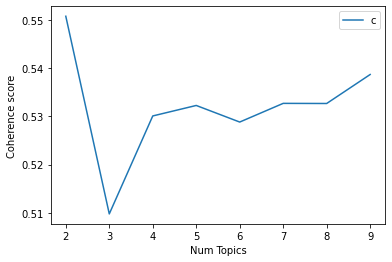

Num Topics = 2  has Coherence Value of 0.5507
Num Topics = 3  has Coherence Value of 0.5098
Num Topics = 4  has Coherence Value of 0.5301
Num Topics = 5  has Coherence Value of 0.5322
Num Topics = 6  has Coherence Value of 0.5288
Num Topics = 7  has Coherence Value of 0.5327
Num Topics = 8  has Coherence Value of 0.5327
Num Topics = 9  has Coherence Value of 0.5387


In [49]:
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [50]:

from pprint import pprint
optimal_model = model_list[0]

coherence_model_lda = CoherenceModel(model=optimal_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=30))


Coherence Score:  0.5507244041816899
[(0,
  '0.050*"error" + 0.043*"file" + 0.042*"name" + 0.039*"import" + '
  '0.035*"version" + 0.033*"project" + 0.032*"line" + 0.032*"http" + '
  '0.031*"python" + 0.030*"image" + 0.027*"module" + 0.026*"output" + '
  '0.025*"command" + 0.025*"list" + 0.024*"path" + 0.023*"code" + 0.023*"json" '
  '+ 0.023*"text" + 0.023*"package" + 0.022*"github" + 0.021*"build" + '
  '0.020*"server" + 0.019*"test" + 0.019*"system" + 0.019*"user" + '
  '0.017*"core" + 0.017*"index" + 0.017*"create" + 0.017*"message" + '
  '0.017*"default"'),
 (1,
  '0.052*"class" + 0.046*"value" + 0.046*"function" + 0.042*"java" + '
  '0.042*"const" + 0.039*"return" + 0.032*"example" + 0.032*"code" + '
  '0.031*"type" + 0.029*"time" + 0.027*"size" + 0.027*"number" + 0.027*"work" '
  '+ 0.027*"problem" + 0.027*"page" + 0.024*"question" + 0.024*"application" + '
  '0.023*"result" + 0.023*"something" + 0.022*"method" + 0.021*"version" + '
  '0.021*"case" + 0.020*"change" + 0.019*"sol

In [51]:
 

original_post = data['Post']
original_cleaned_keywords = data['splitted_tags']

In [52]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=tfidf_corpus, texts=original_post)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic = pd.concat([df_dominant_topic, original_cleaned_keywords], axis=1)
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text', 'Original_keywords']

# Show
df_dominant_topic.head(10)

<ipython-input-52-f3c47998d6f1>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-52-f3c47998d6f1>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Original_keywords
0,0.0,0.0,0.8192,"error, file, name, import, version, project, l...","Error message ""error:0308010C:digital envelope...","[node, reactjs, webpack, webstorm]"
1,1.0,0.0,0.7498,"error, file, name, import, version, project, l...","How can I resolve the error ""The minCompileSdk...","[java, android, kotlin, gradle]"
2,2.0,1.0,0.5606,"class, value, function, java, const, return, e...","""You are running create-react-app 4.0.3 which ...","[javascript, reactjs, install, yarnpkg]"
3,3.0,1.0,0.5434,"class, value, function, java, const, return, e...",Bubble sort slower with -O3 than -O2 with GCC ...,"[architecture, compiler, optimization]"
4,4.0,0.0,0.7308,"error, file, name, import, version, project, l...",Webpack build failing with ERR_OSSL_EVP_UNSUPP...,[webpack]
5,5.0,1.0,0.7277,"class, value, function, java, const, return, e...",iOS 15 Navigation Bar Transparent <p>My iOS ap...,"[swift, uinavigationcontroller, xcode]"
6,6.0,0.0,0.7482,"error, file, name, import, version, project, l...",Resource linking fails on lStar <p>I'm working...,"[android, react, native]"
7,7.0,1.0,0.7975,"class, value, function, java, const, return, e...",Why is a segmentation fault not recoverable? <...,"[exception, segmentation, fault]"
8,8.0,1.0,0.5449,"class, value, function, java, const, return, e...",What is this odd sorting algorithm? <p>Some <a...,"[python, algorithm, sorting]"
9,9.0,0.0,0.7400,"error, file, name, import, version, project, l...",Warning: Multiple merge bases detected. The li...,"[azure, azure, devops, azure, repos]"


In [53]:
 

sent_topics_sorteddf = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.8874,"error, file, name, import, version, project, l...",How to check for float('nan') in Python? <p>In...
1,1.0,0.8641,"class, value, function, java, const, return, e...",Alternative for Prompt in React Router V6 <p>W...


In [54]:
  
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = sent_topics_sorteddf[["Topic_Num","Keywords"]]

# Concatenate Column wise
df_dominant_topics_prop = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics_prop.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics_prop

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,0.0,"error, file, name, import, version, project, l...",1504,0.5491
1.0,1.0,"class, value, function, java, const, return, e...",1235,0.4509


In [55]:
 

from IPython.display import HTML
css_str = '<style> \
.jp-icon-warn0 path {fill: var(--jp-warn-color0);} \
.bp3-button-text path { fill: var(--jp-inverse-layout-color3);} \
.jp-icon-brand0 path { fill: var(--jp-brand-color0);} \
text.terms { fill: #616161;} \
</style>'
display(HTML(css_str))

import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, tfidf_corpus, id2word)
pyLDAvis.save_html(vis, 'lda_tfidf.html')
display(HTML('lda_tfidf.html'))

C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [56]:
lda_model = optimal_model
def predict_unsupervised_tags(text):
    """
    Predict tags of a preprocessed text
    
    Args:
        text(list): preprocessed text
        
    Returns:
        relevant_tags(list): list of tags
    """
    
    corpus_new = id2word.doc2bow(text)
    topics = lda_model.get_document_topics(corpus_new)
    
    #find most relevant topic according to probability
    relevant_topic = topics[0][0]
    relevant_topic_prob = topics[0][1]
    
    for i in range(len(topics)):
        if topics[i][1] > relevant_topic_prob:
            relevant_topic = topics[i][0]
            relevant_topic_prob = topics[i][1]
            
    #retrieve associated to topic tags present in submited text
    potential_tags = lda_model.get_topic_terms(topicid=relevant_topic, topn=20)
    
    relevant_tags = [id2word[tag[0]] for tag in potential_tags if id2word[tag[0]] in text]
    
    return relevant_tags


C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
def check_tag_predction(original_text, original_tags, preprocessed_text, supervised_model):
    """
    Check original tags vs predicted tags for a post.
    
    Args:
        post(list) : original text
        original_tags(list) : preprocessed_tags
    """
    
    predicted_supervised_tags = predict_supervised_tags(supervised_model, mlb, preprocessed_text)
    predicted_unsupervised_tags = predict_unsupervised_tags(preprocessed_text)
    print("Publication originale: \n")
    print(f"{original_text}")
    print("\n")
    print(f"Liste des tags pré-traités utilisés par l'utilisateur: {original_tags}")
    print("\n")
    print(f"Liste des tags prédits par le modèle supervisé: {predicted_supervised_tags}")
    print("\n")
    print(f"Liste des tags prédits par le modèle non supervisé: {predicted_unsupervised_tags}")
    return(original_tags,predicted_supervised_tags,predicted_unsupervised_tags)
   
origine=[]
superv=[]
nsuperv=[]

print("Test des 10 premiers documents du corpus\n")
for i in range(25):
    print(f"Document {i}:")
    print("\n")
    a,b,c=check_tag_predction(filtered_tokenized_vs_original.loc[i,'Post'], 
                    filtered_tokenized_vs_original.loc[i,'splitted_tags'],
                    filtered_tokenized_vs_original.loc[i,'splitted_text'],
                    svm_clf)
    origine.append(a)
    superv.append(b)
    nsuperv.append(c)
    print("-"*100 + "\n")
df=pd.DataFrame([origine,superv,nsuperv])
df.T

C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Test des 10 premiers documents du corpus

Document 0:


Publication originale: 

Error message "error:0308010C:digital envelope routines::unsupported" <p>I created the default IntelliJ IDEA React project and got this:</p>
<pre class="lang-none prettyprint-override"><code>Error: error:0308010C:digital envelope routines::unsupported
    at new Hash (node:internal/crypto/hash:67:19)
    at Object.createHash (node:crypto:130:10)
    at module.exports (/Users/user/Programming Documents/WebServer/untitled/node_modules/webpack/lib/util/createHash.js:135:53)
    at NormalModule._initBuildHash (/Users/user/Programming Documents/WebServer/untitled/node_modules/webpack/lib/NormalModule.js:417:16)
    at handleParseError (/Users/user/Programming Documents/WebServer/untitled/node_modules/webpack/lib/NormalModule.js:471:10)
    at /Users/user/Programming Documents/WebServer/untitled/node_modules/webpack/lib/NormalModule.js:503:5
    at /Users/user/Programming Documents/WebServer/untitled/node_module

Publication originale: 

What is this odd sorting algorithm? <p>Some <a href="https://stackoverflow.com/a/69435932/16759116">answer</a> originally had this sorting algorithm:</p>
<pre class="lang-none prettyprint-override"><code>for i from 0 to n-1:
    for j from 0 to n-1:
        if A[j] &gt; A[i]:
            swap A[i] and A[j]
</code></pre>
<p>Note that both <code>i</code> and <code>j</code> go the full range and thus <code>j</code> can be both larger and smaller than <code>i</code>, so it can make pairs both correct and wrong order (and it actually <em>does</em> do both!). I thought that's a mistake (and the author later called it that) and that this would jumble the array, but it does appear to sort correctly. It's not obvious why, though. But the <em>code</em> simplicity (going full ranges, and no <code>+1</code> as in bubble sort) makes it interesting.</p>
<p><strong>Is it correct? If so, why does it work? And does it have a name?</strong></p>
<p>Python implementation with test

Publication originale: 

Why is Python list slower when sorted? <p>In the following code, I create two lists with the same values: one list unsorted (s_not), the other sorted (s_yes). The values are created by randint(). I run some loop for each list and time it.</p>
<pre><code>import random
import time

for x in range(1,9):

    r = 10**x # do different val for the bound in randint()
    m = int(r/2)

    print(&quot;For rand&quot;, r)

    # s_not is non sorted list
    s_not = [random.randint(1,r) for i in range(10**7)]

    # s_yes is sorted
    s_yes = sorted(s_not)

    # do some loop over the sorted list
    start = time.time()
    for i in s_yes:
        if i &gt; m:
            _ = 1
        else:
            _ = 1
    end = time.time()
    print(&quot;yes&quot;, end-start)

    # do the same to the unsorted list
    start = time.time()
    for i in s_not:
        if i &gt; m:
            _ = 1
        else:
            _ = 1
    end = time.time()
    print(&quot;not&quot;, en

,0,1,2
0,"[node, reactjs, webpack, webstorm]",[],"[error, project, module]"
1,"[java, android, kotlin, gradle]",[java],"[error, file, module]"
2,"[javascript, reactjs, install, yarnpkg]",[],[error]
3,"[architecture, compiler, optimization]",[],"[return, code, time, size]"
4,[webpack],[],"[error, name, http, module, output, command, p..."
5,"[swift, uinavigationcontroller, xcode]",[],"[code, problem, application]"
6,"[android, react, native]",[],"[error, project]"
7,"[exception, segmentation, fault]",[],"[time, question]"
8,"[python, algorithm, sorting]",[],"[work, question]"
9,"[azure, azure, devops, azure, repos]",[],[list]


In [58]:
df = df.T
df

C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2
0,"[node, reactjs, webpack, webstorm]",[],"[error, project, module]"
1,"[java, android, kotlin, gradle]",[java],"[error, file, module]"
2,"[javascript, reactjs, install, yarnpkg]",[],[error]
3,"[architecture, compiler, optimization]",[],"[return, code, time, size]"
4,[webpack],[],"[error, name, http, module, output, command, p..."
5,"[swift, uinavigationcontroller, xcode]",[],"[code, problem, application]"
6,"[android, react, native]",[],"[error, project]"
7,"[exception, segmentation, fault]",[],"[time, question]"
8,"[python, algorithm, sorting]",[],"[work, question]"
9,"[azure, azure, devops, azure, repos]",[],[list]


In [59]:
df.rename(columns={0: 'pré-traités', 1: 'approche supervisée', 2: 'approche non supervisée'}, inplace=True)
df

C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,pré-traités,approche supervisée,approche non supervisée
0,"[node, reactjs, webpack, webstorm]",[],"[error, project, module]"
1,"[java, android, kotlin, gradle]",[java],"[error, file, module]"
2,"[javascript, reactjs, install, yarnpkg]",[],[error]
3,"[architecture, compiler, optimization]",[],"[return, code, time, size]"
4,[webpack],[],"[error, name, http, module, output, command, p..."
5,"[swift, uinavigationcontroller, xcode]",[],"[code, problem, application]"
6,"[android, react, native]",[],"[error, project]"
7,"[exception, segmentation, fault]",[],"[time, question]"
8,"[python, algorithm, sorting]",[],"[work, question]"
9,"[azure, azure, devops, azure, repos]",[],[list]


In [60]:
import pickle 

filename_model = r'C:\Users\sesa638933\Desktop\OC\P5\lda_model.pkl'
pickle.dump(lda_model, open(filename_model,'wb'))



filename_dictionary = r'C:\Users\sesa638933\Desktop\OC\P5\dictionary.pkl'
pickle.dump(id2word, open(filename_dictionary,'wb'))

C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
import pandas as pd
import lxml
import html5lib
import re
import pickle
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
import gensim
import gensim.corpora as corpora
from gensim import models
from gensim.utils import simple_preprocess
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import CoherenceModel

def clean_html(text):
    """
    Remove HTML from a text.
    
    Args:
        text(String): Row text with html       
    Returns:
        cleaned String
    """ 
    soup = BeautifulSoup(text, "html5lib")

    for sent in soup(['style', 'script']):
            sent.decompose()
    
    return ' '.join(soup.stripped_strings)

def text_cleaning(text):
    """
    Remove figures, punctuation, words shorter than two letters (excepted C or R) in a lowered text. 
    
    Args:
        text(String): Row text to clean  
    Returns:
        res(string): Cleaned text
    """
    pattern = re.compile(r'[^\w]|[\d_]')
    
    try: 
        res = re.sub(pattern," ", text).lower()
    except TypeError:
        return text
    
    res = res.split(" ")
    res = list(filter(lambda x: len(x)>3 , res)) #Keep singles c and r because it might be used as name of languages
    res = " ".join(res)
    return res


def tokenize(text):
    """
    Tokenize words of a text.
    
    Args:
        text(String): Row text
    Returns
        res(list): Tokenized string.
    """
    stop_words = set(stopwords.words('english'))
    
    try:
        res = word_tokenize(text, language='english')
    except TypeError:
        return text
    
    res = [token for token in res if token not in stop_words]
    return res

def filtering_nouns(tokens):
    """
    Filter singular nouns
    
    Args:
        tokens(list): A list o tokens
        
    Returns:
    
        res(list): Filtered token list
    """ 
    res = nltk.pos_tag(tokens)
    
    res = [token[0] for token in res if token[1] == 'NN']
    
    return res
    
def lemmatize(tokens):
    """
    Transform tokens into lems 
    
    Args:
        tokens(list): List of tokens       
    Returns:
        lemmatized(list): List of lemmatized tokens
    """
    lemmatizer = WordNetLemmatizer()
    lemmatized = []
    
    for token in tokens:
        lemmatized.append(lemmatizer.lemmatize(token))
        
    return lemmatized


class LdaModel:

    def __init__(self):
        filename_model = r"C:\Users\sesa638933\Desktop\OC\P5\lda_model.pkl"
        filename_dictionary = r"C:\Users\sesa638933\Desktop\OC\P5\dictionary.pkl"
        self.model = pickle.load(open(filename_model, 'rb'))
        self.dictionary = pickle.load(open(filename_dictionary, 'rb'))

    def predict_tags(self, text):
        """
        Predict tags
        zof a preprocessed text
        
        Args:
            text(list): preprocessed text
        Returns:
            res(list): list of tags
        """
        corpus_new = self.dictionary.doc2bow(text)
        topics = self.model.get_document_topics(corpus_new)
        
        #find most relevant topic according to probability
        relevant_topic = topics[0][0]
        relevant_topic_prob = topics[0][1]
        
        for i in range(len(topics)):
            if topics[i][1] > relevant_topic_prob:
                relevant_topic = topics[i][0]
                relevant_topic_prob = topics[i][1]
                
        #retrieve associated to topic tags present in submited text
        res = self.model.get_topic_terms(topicid=relevant_topic, topn=20)
        
        res = [self.dictionary[tag[0]] for tag in res if self.dictionary[tag[0]] in text]
        
        return res

C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:

from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary


text = input()

text_wo_html = clean_html(text)
cleaned_text = text_cleaning(text_wo_html)
tokenized_text = tokenize(cleaned_text)
filtered_noun_text = filtering_nouns(tokenized_text)
lemmatized_text = lemmatization(filtered_noun_text)
unsupervised_tags = predict_unsupervised_tags(lemmatized_text)

unsupervised_tags





C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


How to remove a column in python


['python']